**BFSI Credit Score Case Study**

ECL method is used for provisioning the capital buffer to protect banks against possible default of the customers. The ECL provisioning is a mandatory accounting principle set by the Basel III norms.

The Basel norms, also known as the Basel Accords or Basel Regulations, are a set of international regulatory standards for the banking industry. These norms were developed by the Basel Committee on Banking Supervision, which is an international committee of banking supervisors from around the world. The committee was formed in 1974 by the central bank governors of the Group of Ten (G-10) countries. The history of the Basel norms can be traced back to the late 1970s and early 1980s when the banking industry was facing a series of crises and failures. These crises were caused by a combination of factors, including insufficient capital and liquidity, inadequate risk management and weak supervisory oversight. In response to these crises, the Basel Committee began to develop a set of international standards for bank capital and risk management to strengthen the resilience of the global banking system and reduce the risk of bank failures.

 

The first Basel Accord, known as Basel I, was issued in 1988, which introduced the first set of minimum capital requirements for banks. Basel I was revised in 2004 with the introduction of Basel II, which aimed to improve the risk sensitivity of the capital requirements and provide a more sophisticated approach to calculating capital ratios. Subsequently, Basel III was introduced in 2009, with stricter rules and regulations, largely in response to the financial crisis of 2007–2008 and the ensuing economic recession. It aimed to strengthen the resilience of the banking system against financial stress and improve the ability of banks to absorb losses.
 

The Basel norms are used to ensure that banks maintain sufficient levels of capital and liquidity to withstand financial shocks and reduce the risk of bank failures. The norms cover a range of areas, including minimum capital requirements, risk-weighted assets and the calculation of capital ratios. Banks are required to comply with the Basel norms to ensure the stability and resilience of the global financial system. Non-compliance with these norms can result in regulatory penalties and other consequences for banks.

 

To comply with the regulatory norms, a bank needs to provision funds. Provisioning refers to the process of setting aside funds to cover potential losses from defaulted loans. Therefore, provisioning is an important part of a bank's risk management strategy. The provisioning by banks is also an important macroeconomic metric to gauge the economic conditions of a country. Banks may use several methods to calculate the amount of provisioning required, such as lifetime expected loss (LEL), stressed loss analysis (SLA), current expected credit loss (CECL) and through-the-cycle (TTC) and expected credit loss (ECL).

 

For this assignment, we will focus on the expected credit loss (ECL) calculation method.

Expected credit loss (ECL) computation is a method used in credit risk management to determine the amount of loss a bank is expected to incur in the event a borrower defaults on their loan. Different banks may use different methodologies for calculating the expected credit loss (ECL) and provisioning. rk of a bank.
Banks are allowed to use their own methodologies and incorporate factors relevant to their specific business operations. Some banks may choose to use historical data and statistical models to estimate the components of ECL calculation, while others may rely on expert judgement. The choice of the method can vary depending on factors such as the bank's risk appetite, the nature of the loans and the available data. Additionally, some banks may include certain external factors, such as macroeconomic conditions, in their calculations, while others may not. 

The formula for ECL typically used in practice is as follows:

ECL = EAD x PD x LGD


Expected credit loss = Exposure at default x Probability of Default x Loss given default]
 

ECLs are calculated based on the exposure at default (EAD), probability of default (PD) and the loss given default (LGD) for each borrower. Banks can calculate the ECL for different points in time based on their risk management strategy and regulatory requirements.

 

For this assignment, we will consider the latest date from which the data is available as the point in time. This means we will estimate the expected credit loss (ECL) for the borrower assuming that the borrower has defaulted at the present point in time.

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the datasets
main = pd.read_csv("G:/M/BA/BFSI Credit Risk Analysis/main_loan_base.csv")
monthly = pd.read_csv("G:/M/BA/BFSI Credit Risk Analysis/monthly_balance_base.csv")
repayment = pd.read_csv("G:/M/BA/BFSI Credit Risk Analysis/repayment_base.csv")

In [3]:
#importing the test datasets
test_main = pd.read_csv("G:/M/BA/BFSI Credit Risk Analysis/test_data/test_main_loan_base.csv")
test_monthly = pd.read_csv("G:/M/BA/BFSI Credit Risk Analysis/test_data/test_monthly_balance_base.csv")
test_repayment = pd.read_csv("G:/M/BA/BFSI Credit Risk Analysis/test_data/test_repayment_base.csv")

In [33]:
main.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
15980,LN43810328,Damini Rana,"H.No. 33, Wali Street, Mango-796755",Two-Wheeler,137765,7046.47,4,1,8,87,3,14.1,4715.18,2013-02-03,2014-05-12
4809,LN96568576,Taran Taneja,028\nRaval Zila\nMau-740983,Consumer-Durable,4131,910.56,0,0,0,162,2,13.4,197.17,2017-10-05,2019-01-13
26762,LN35186977,Alia Lanka,"39/56, Agrawal Circle\nDanapur-543830",Two-Wheeler,117191,21472.10,0,2,5,115,2,14.1,5632.22,2018-01-03,2019-03-11
26992,LN66519333,Dhanush Dube,H.No. 85\nBhattacharyya Zila\nGuna 897376,Car,416566,44679.50,5,4,20,75,4,13.5,11279.08,2021-03-06,2024-05-22
42157,LN46268050,Divit Vyas,"62, Handa Road\nNadiad 446997",Car,633302,97537.57,4,2,4,88,1,8.7,55295.13,2020-04-28,2020-08-19


In [34]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [4]:
main['disbursal_date'] = pd.to_datetime(main['disbursal_date'], infer_datetime_format=True)
main['default_date'] = pd.to_datetime(main['default_date'], infer_datetime_format=True)
#data['repayment_date'] = pd.to_datetime(data['repayment_date'], infer_datetime_format=True)

In [5]:
test_main['disbursal_date'] = pd.to_datetime(test_main['disbursal_date'], infer_datetime_format=True)
test_main['default_date'] = pd.to_datetime(test_main['default_date'], infer_datetime_format=True)

In [6]:
#Creating a new data set with zero duplicates.
main = main[~main['loan_acc_num'].duplicated()]
print(main.shape)

(49985, 15)


In [7]:
#Creating a new data set with zero duplicates.
test_main = test_main[~test_main['loan_acc_num'].duplicated()]
print(test_main.shape)

(9997, 15)


In [6]:
repayment.sample(5)

,loan_acc_num,repayment_amount,repayment_date
198209,LN80523807,524.26,2014-12-19
178653,LN35391186,12159.83,2022-08-25
565136,LN34732917,531.21,2017-08-07
504479,LN64359926,11327.19,2017-03-13
569118,LN88080555,1564.93,2015-05-19


In [7]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [8]:
repayment['loan_acc_num'].nunique()

46008

In [8]:
repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
repayment.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.47
2,LN10004116,290634.94
3,LN10007976,337321.72
4,LN10010204,61290.49


In [9]:
test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [19]:
test.sample(5)

,loan_acc_num,average_monthly_balance,balance_amount
21,LN69604180,11.290584,11.144856
31,LN62001498,744.180514,714.169474
42,LN36224009,40830.933713,39558.834614
45,LN50851647,7442.201238,7701.408637
15,LN43800538,147.914138,150.100603


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_acc_num             50 non-null     object 
 1   average_monthly_balance  50 non-null     float64
 2   balance_amount           50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [10]:
main.shape

(49985, 15)

In [11]:
repayment.shape

(46008, 2)

In [10]:
df = pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [11]:
test_df = pd.merge(
    left=test_main,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [7]:
df.shape

(49985, 16)

In [12]:
#deriving the target
df['target'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [15]:
df.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
40075,LN68635161,Miraya Upadhyay,"82/78\nDhingra, Giridih 671088",Personal,215636,36793.38,3,1,29,15,5,13.7,4984.00,2020-04-22,2022-06-14,24147.43,0.717390
38219,LN29881171,Anahi Karnik,"79\nTata Road, Dehri 291560",Consumer-Durable,15588,3441.39,0,3,28,45,5,8.8,322.07,2018-08-02,2021-10-10,966.21,0.717244
44002,LN81498539,Rati Kapoor,H.No. 982\nSule Zila\nRewa 334544,Personal,11884,2428.75,1,3,11,15,2,10.6,551.68,2020-05-01,2021-08-10,NaN,NaN
35783,LN92435419,Nakul Boase,H.No. 137\nDe Road\nAgra 367740,Two-Wheeler,80004,12485.56,1,2,11,15,2,13.3,3814.82,2020-06-20,2021-08-16,3814.82,0.796255
12105,LN61898906,Shaan Sundaram,"H.No. 058, Johal Ganj\nMalda-910077",Consumer-Durable,4920,364.68,0,1,6,156,2,8.7,224.09,2018-11-28,2020-03-13,2913.17,0.333770


In [15]:
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target               3977
dtype: int64

In [16]:
test_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
target               768
dtype: int64

In [57]:
#df['repayment_date'] = df['repayment_date'].fillna(df['repayment_date'].mode()[0])

In [13]:
#null value imputation
df['repayment_amount'] = df['repayment_amount'].fillna(0)

In [14]:
#null value imputation
test_df['repayment_amount'] = test_df['repayment_amount'].fillna(0)

In [15]:
#null value imputation
df['target'] = df['target'].fillna(df['target'].mean())

In [17]:
#creating new variable: feature engineering
df['due'] = df['loan_amount'] - df['repayment_amount']

In [18]:
#creating new variable: feature engineering
test_df['due'] = test_df['loan_amount'] - test_df['repayment_amount']

In [22]:
monthly.sample(5)

,loan_acc_num,date,balance_amount
3255936,LN32368451,2017-09-11,97.804949
2139874,LN42538766,2017-04-25,5750.963117
932043,LN36098685,2017-01-04,7340.959881
2954976,LN15252116,2012-07-05,687.954669
3627803,LN83413655,2008-11-10,31431.563452


In [23]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [24]:
monthly['loan_acc_num'].nunique()

49671

In [19]:
monthly = round(monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly = pd.DataFrame({"loan_acc_num":monthly.index, "average_monthly_balance":monthly.values})
monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [20]:
test_monthly = round(test_monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly = pd.DataFrame({"loan_acc_num":test_monthly.index, "average_monthly_balance":test_monthly.values})
test_monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


In [21]:
#Merge the datasets
data = pd.merge(
    left=df,
    right=monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [22]:
#Merge the datasets
test_data = pd.merge(
    left=test_df,
    right=test_monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [28]:
data.shape

(49985, 19)

In [29]:
test_data.shape

(9997, 19)

In [46]:
data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target                       0
due                          0
average_monthly_balance    314
dtype: int64

In [23]:
#null value imputation
data['average_monthly_balance'] = data['average_monthly_balance'].fillna(data['average_monthly_balance'].mean())

In [24]:
#null value imputation
test_data['average_monthly_balance'] = test_data['average_monthly_balance'].fillna(test_data['average_monthly_balance'].mean())

In [32]:
data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [33]:
test_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

In [15]:
data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,1.514337e+05,0.423265,2.302806e+05,7679.277191
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,2.554824e+05,0.225701,3.437854e+05,16071.151167
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,0.898372,1.997948e+06,261799.900000


In [25]:
#dropping the records with negative LGD
data = data.drop(data[data['target']<0].index)

In [26]:
test = test_data.copy()

**EDA**

In [27]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [20]:
#top 10 correlated features
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(numeric_data, 10))

Top Absolute Correlations
loan_amount        due                        0.886538
                   monthly_emi                0.819133
                   collateral_value           0.809763
collateral_value   due                        0.803826
monthly_emi        average_monthly_balance    0.798077
loan_amount        repayment_amount           0.780483
monthly_emi        due                        0.718615
repayment_amount   average_monthly_balance    0.714145
vintage_in_months  target                     0.705141
collateral_value   monthly_emi                0.668101
dtype: float64


In [20]:
from statistics import mean
print("Average Monthly EMI: ",round(mean(data['monthly_emi']),2))
print("Average Repayment Amount: ",round(mean(data['repayment_amount']),2))
print("Average Loan Amount: ",round(mean(data['loan_amount']),2))

Average Monthly EMI:  16553.64
Average Repayment Amount:  150993.26
Average Loan Amount:  381630.43


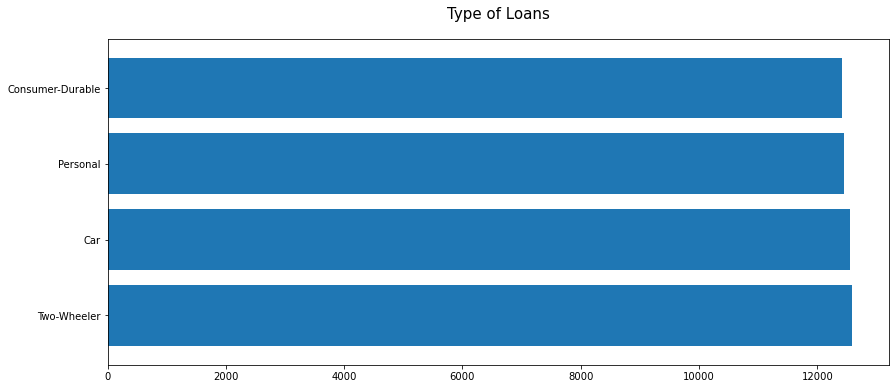

In [53]:
#Univariate Analysis
plt.figure(figsize = [14,6])
data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Type of Loans", fontdict={"fontsize":15}, pad =20)
plt.show()

In [54]:
def Uni_Analysis_Numarical(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distplot')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


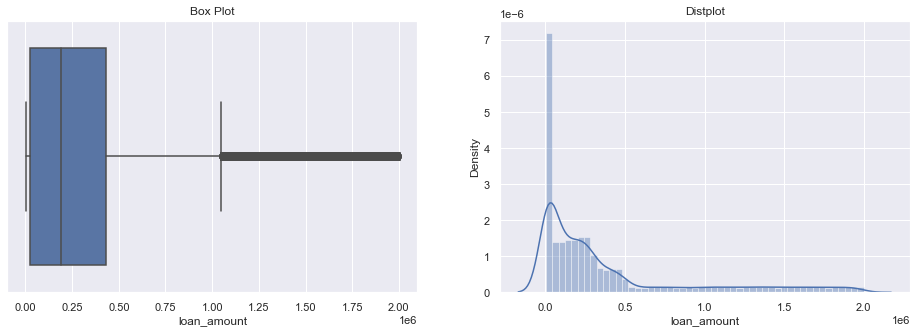

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


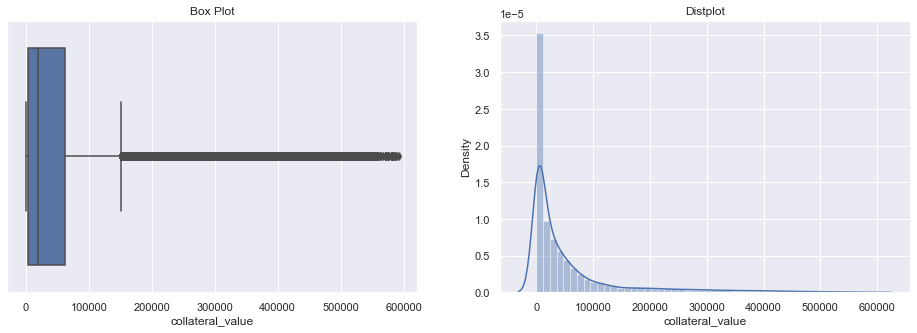

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


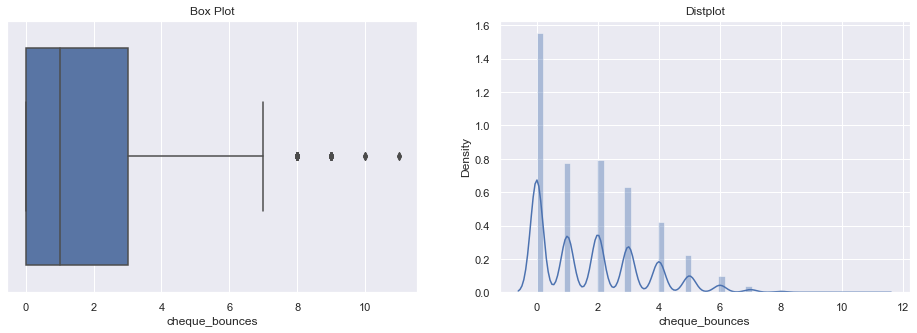

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


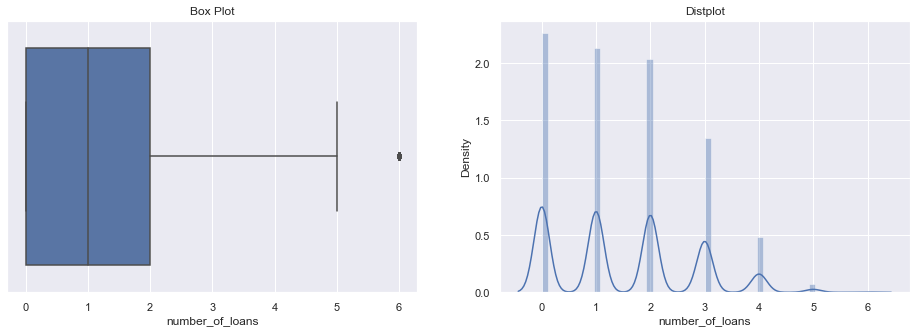

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


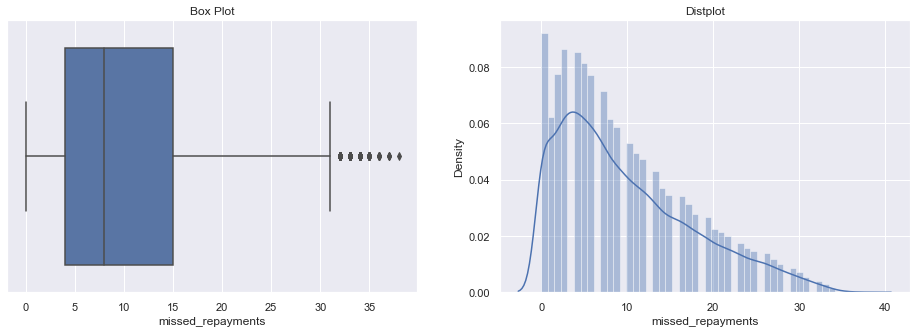

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


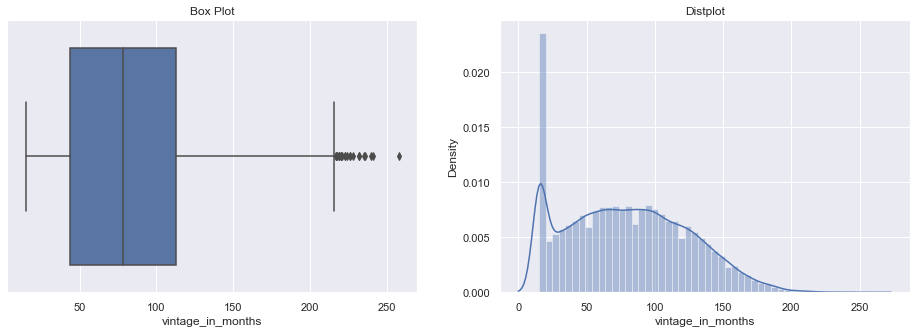

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


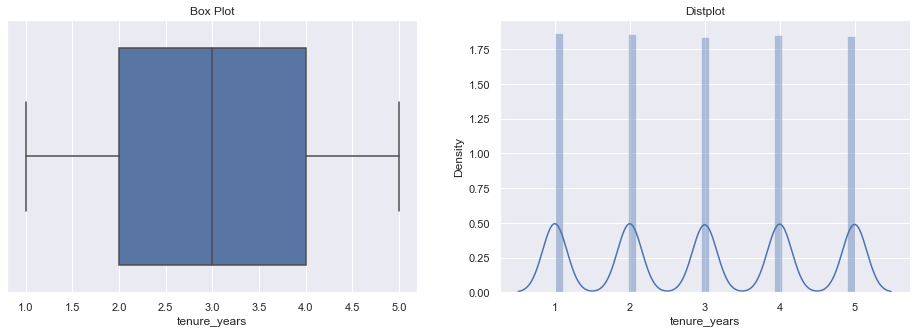

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


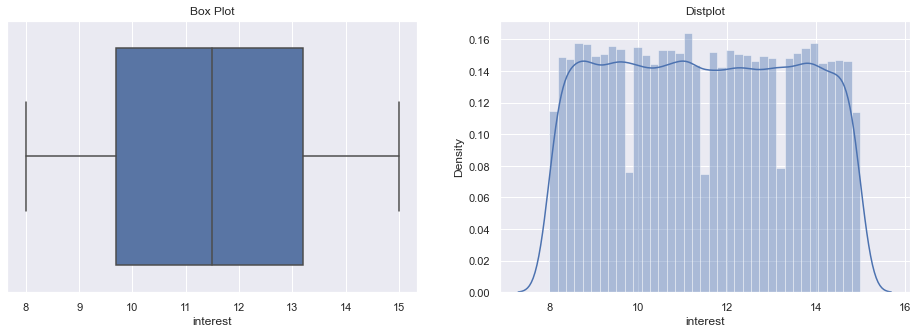

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


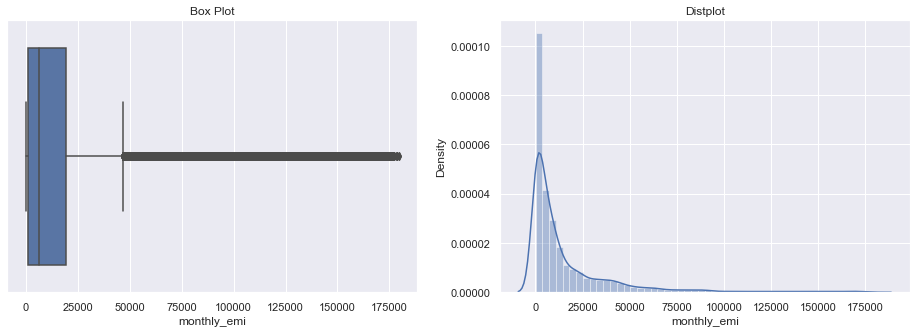

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


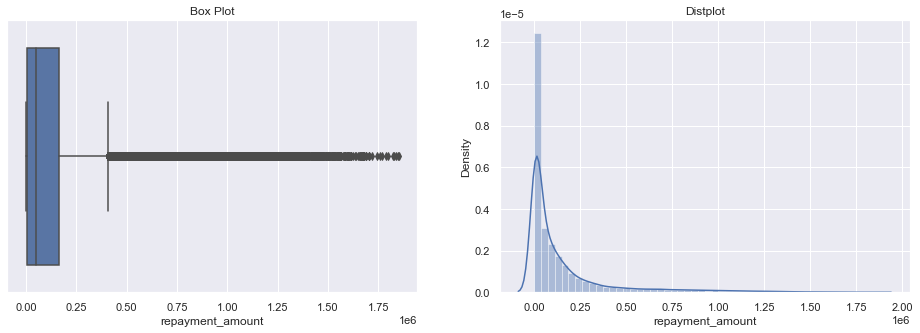

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


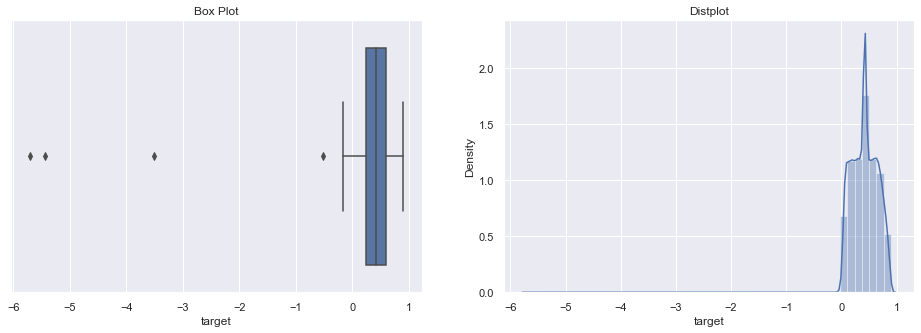

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


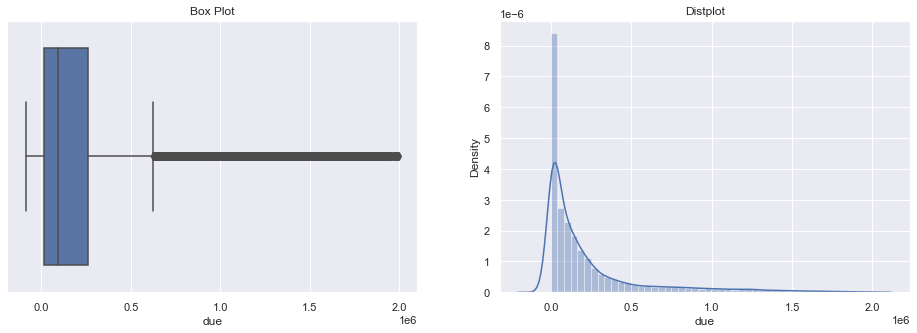

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


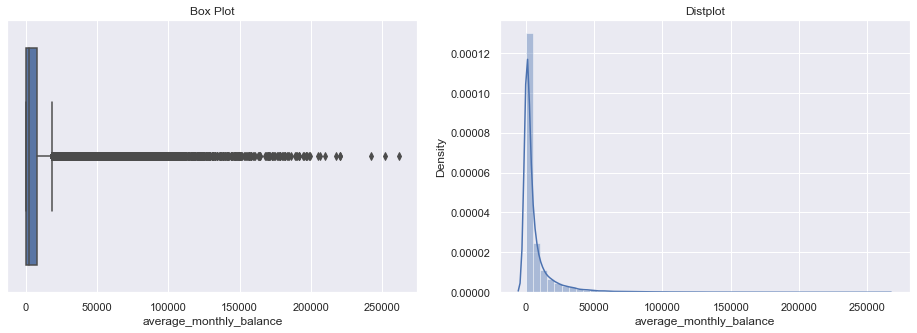

In [55]:
#Distribution of the numerical features
for i in numeric_data:
    Uni_Analysis_Numarical(data,i)

<AxesSubplot:xlabel='loan_amount', ylabel='repayment_amount'>

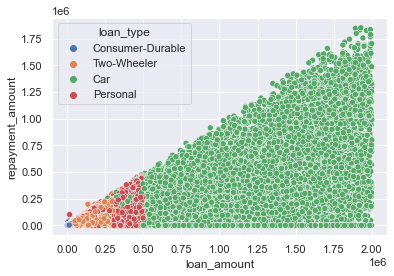

In [56]:
sns.scatterplot(x=data.loan_amount, 
                y = data.repayment_amount, 
                data=data,hue = 'loan_type')

Observation: Though the number of Two-Wheeler loan is greater than others, Car loan comprised the maximum loan amount

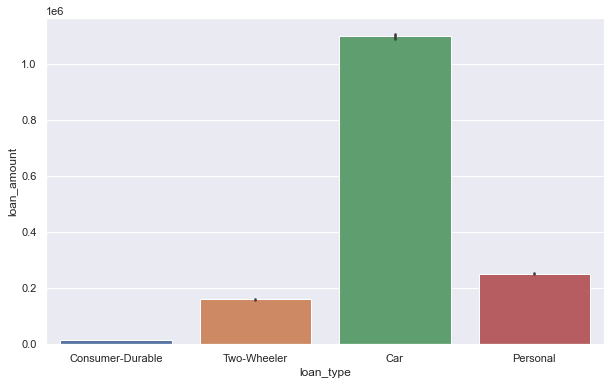

In [21]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.loan_amount)
plt.show()

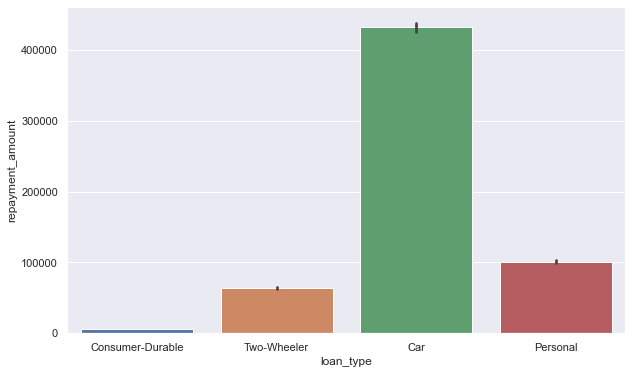

In [22]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.repayment_amount)
plt.show()

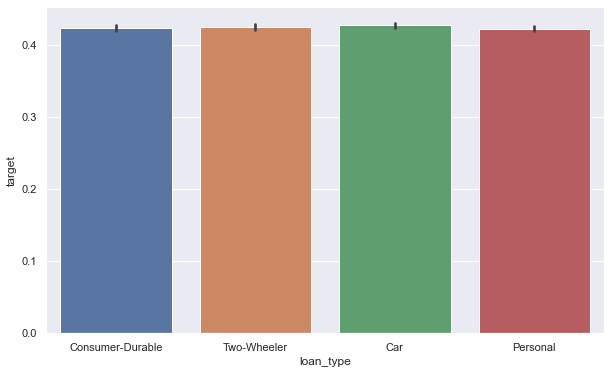

In [23]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.target)
plt.show()

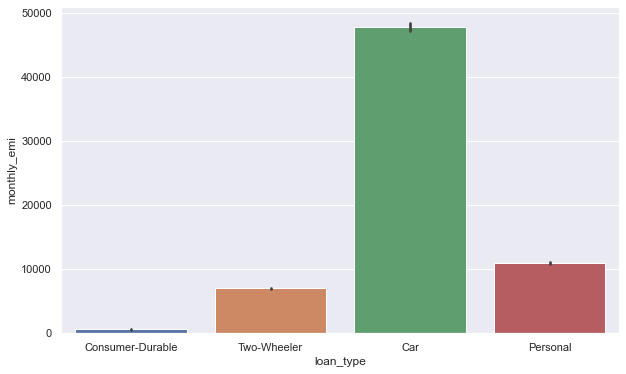

In [60]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.monthly_emi)
plt.show()

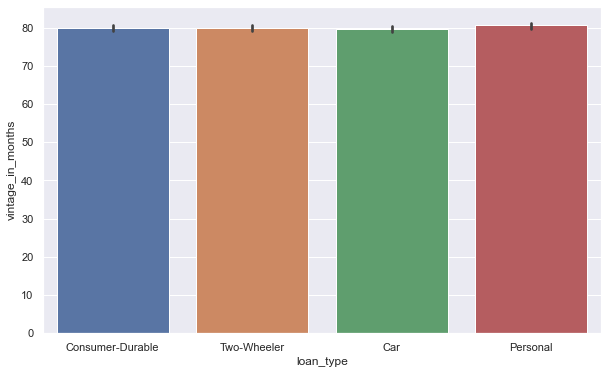

In [61]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.vintage_in_months)
plt.show()

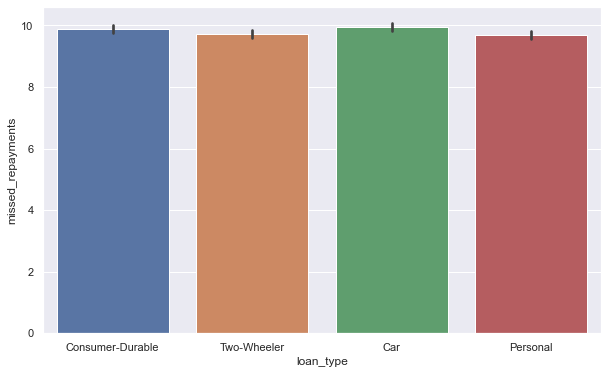

In [62]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.missed_repayments)
plt.show()

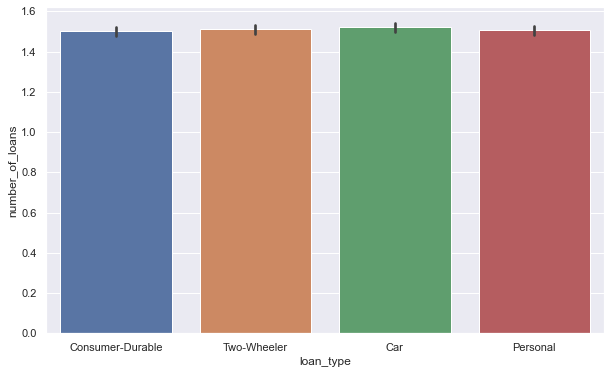

In [63]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.number_of_loans)
plt.show()

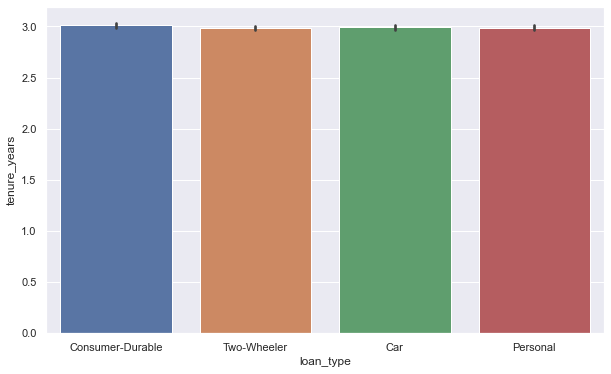

In [64]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.tenure_years)
plt.show()

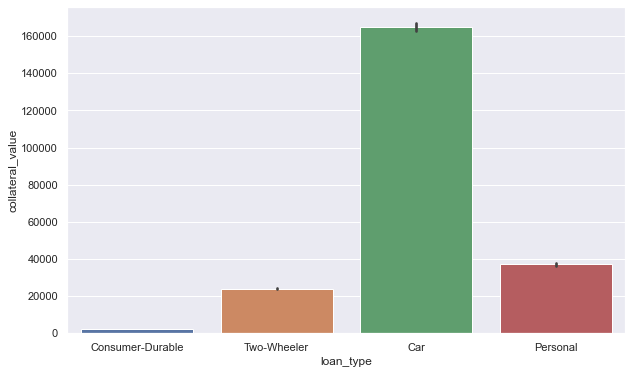

In [65]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.collateral_value)
plt.show()

Observation: Repayment Amount or EMI amount of Car loan are way higher than other loan types 

**Data Preparation: variable transformation, feature engineering**

In [24]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

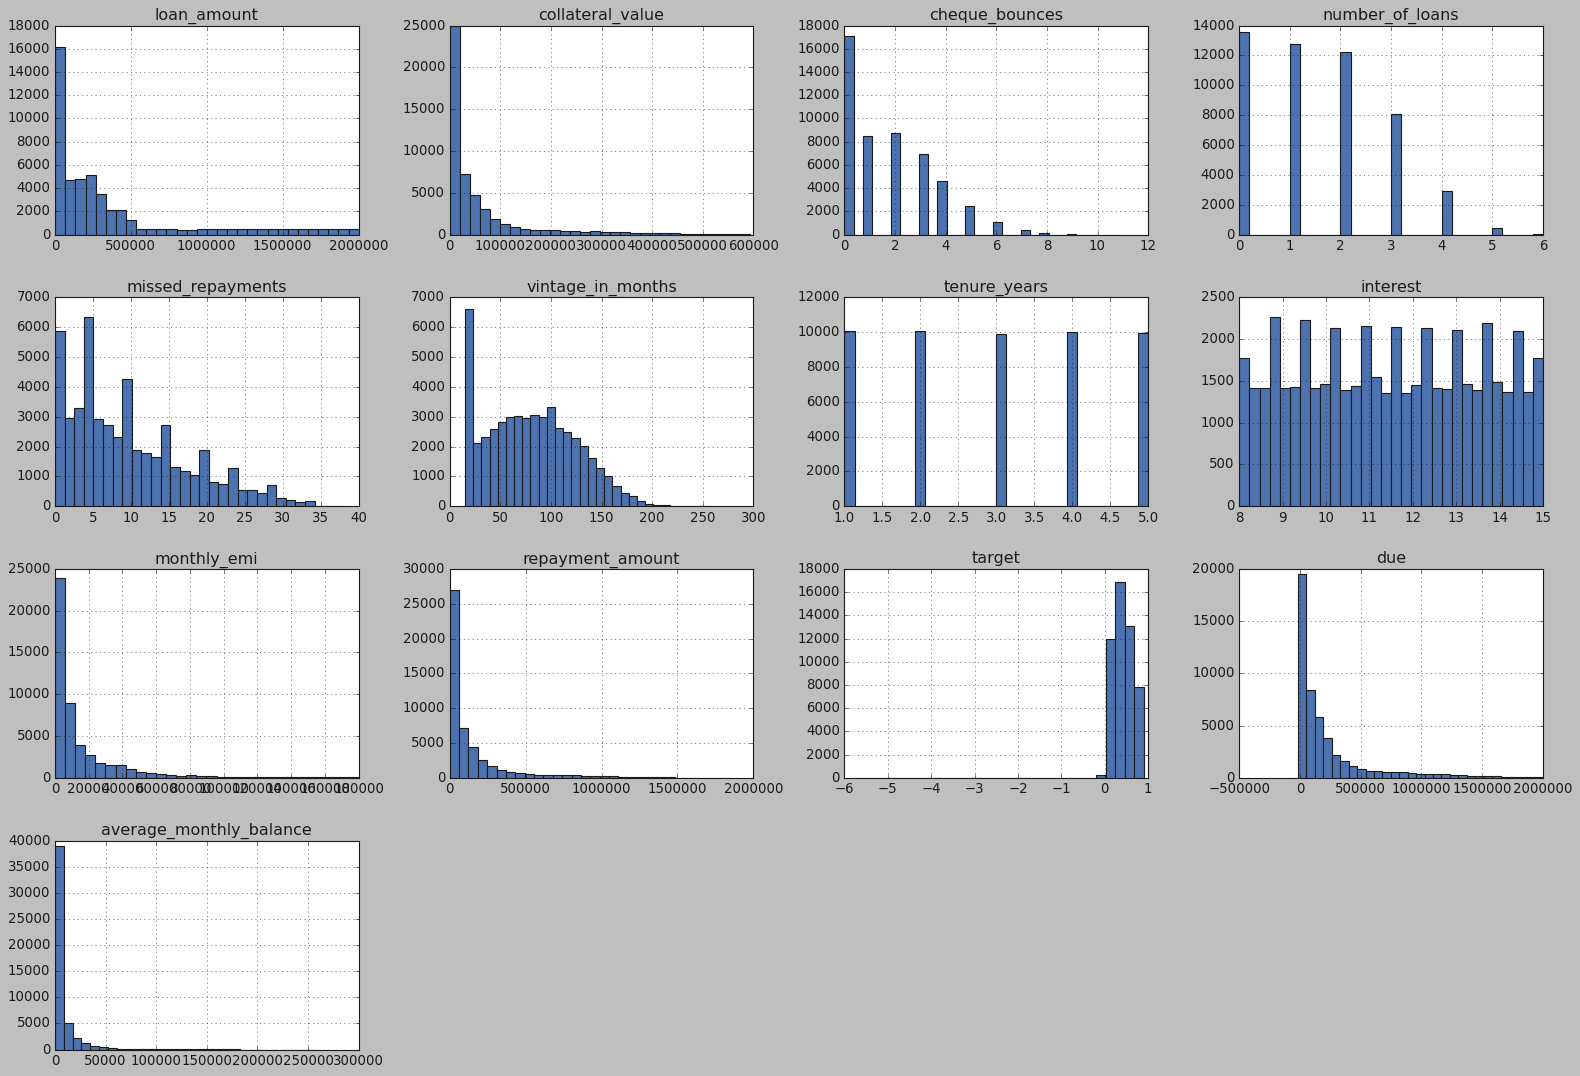

In [66]:
#plt.figure(figsize = (24,24))
plt.style.use('classic')
data[numeric_data.columns].hist(bins=30, figsize = (24,16))
plt.show()


In [82]:
numeric_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance'],
      dtype='object')

<AxesSubplot:>

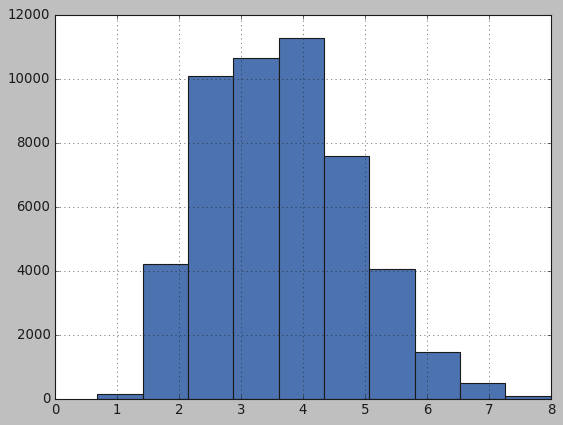

In [84]:
(data['average_monthly_balance']**(1/6)).hist()

<AxesSubplot:>

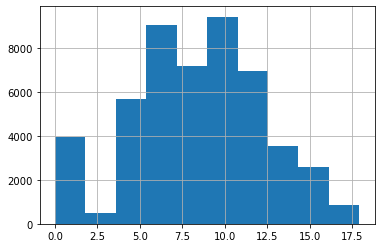

In [40]:
(data['repayment_amount']**(1/5)).hist()
#fig = plt.figure()
#(data['cheque_bounces']).hist()

I used Power Transformation here with respect to the linear regression assumption that all the independent features should have normal distribution

In [28]:
data['loan_amount'] = data['loan_amount']**(1/5)

In [29]:
data['collateral_value'] = data['collateral_value']**(1/5)

In [30]:
data['cheque_bounces'] = data['cheque_bounces']**(1/2)

In [31]:
data['missed_repayments'] = data['missed_repayments']**(1/2)

In [32]:
data['vintage_in_months'] = data['vintage_in_months']**(1/2)

In [33]:
data['monthly_emi'] = data['monthly_emi']**(1/6)

In [34]:
data['repayment_amount'] = data['repayment_amount']**(1/5)

In [35]:
data['average_monthly_balance'] = data['average_monthly_balance']**(1/6)

In [36]:
test_data['collateral_value'] = test_data['collateral_value']**(1/5)
test_data['cheque_bounces'] = test_data['cheque_bounces']**(1/2)
test_data['missed_repayments'] = test_data['missed_repayments']**(1/2)
test_data['vintage_in_months'] = test_data['vintage_in_months']**(1/2)
test_data['monthly_emi'] = test_data['monthly_emi']**(1/6)
test_data['repayment_amount'] = test_data['repayment_amount']**(1/5)
test_data['average_monthly_balance'] = test_data['average_monthly_balance']**(1/8)

<AxesSubplot:>

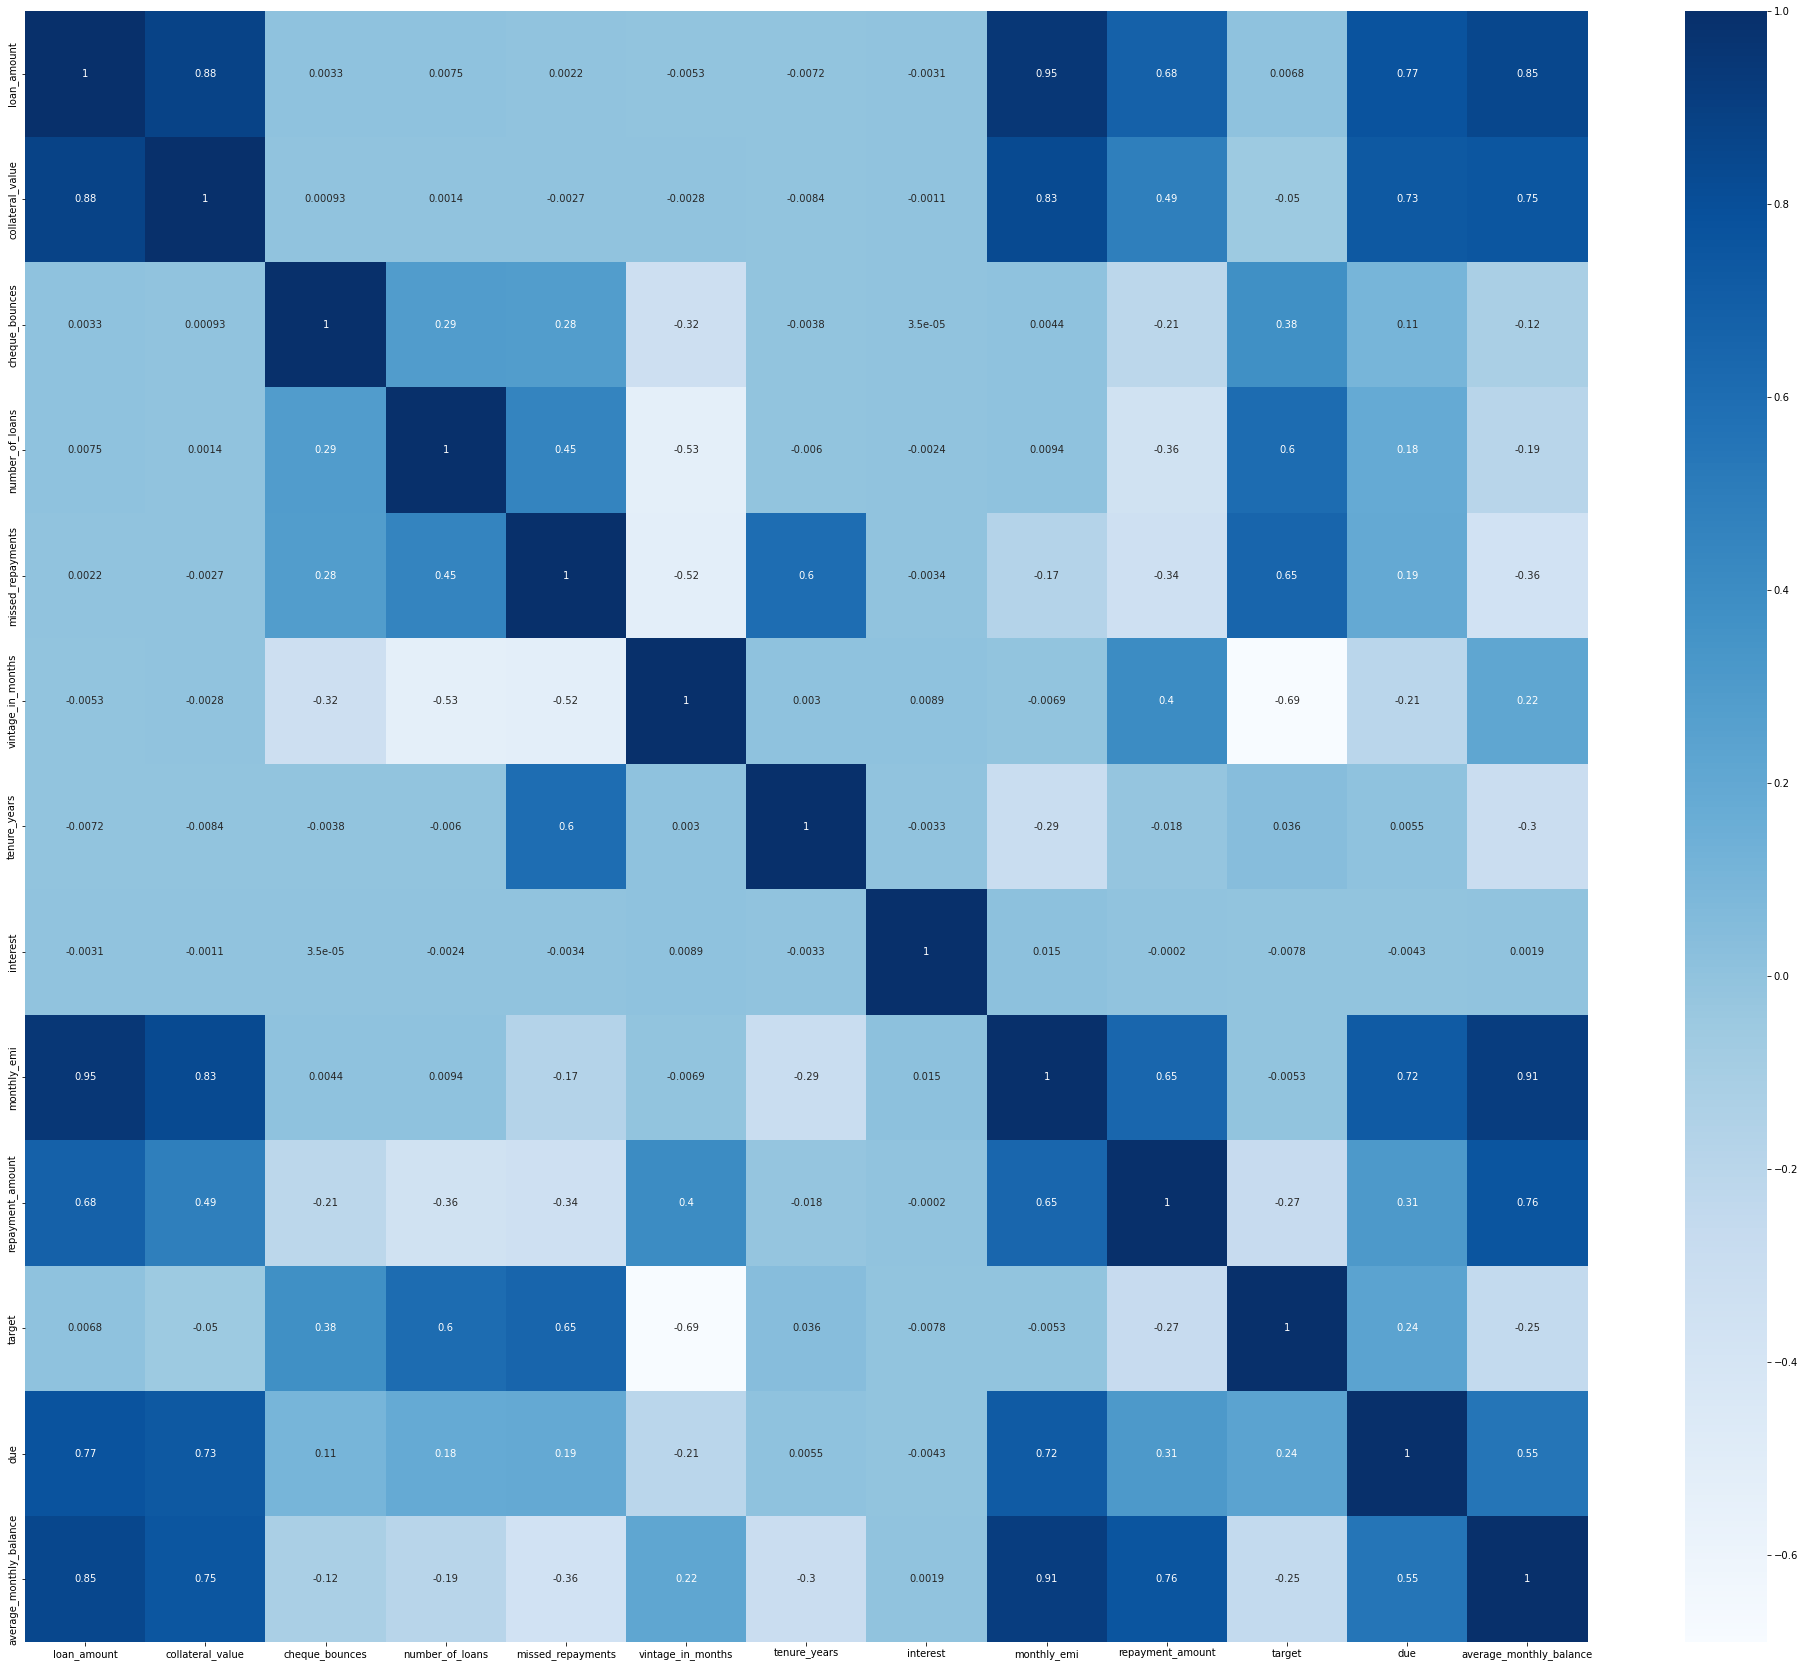

In [54]:
#Correlation Plot: Heatmap
import seaborn as sns
plt.figure(figsize = (35,30))

corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [87]:
categorical_data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date', 'repayment_date'],
      dtype='object')

In [37]:
curr_time = pd.to_datetime("now")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [38]:
#deriving new feature using date column
data['difference'] = (curr_time-data['default_date'])/np.timedelta64(1,'D')

In [39]:
#deriving new feature using date column
test_data['difference'] = (curr_time-test_data['default_date'])/np.timedelta64(1,'D')

In [40]:
#dropping unnecessary columns for model building
data = data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_13404\2745645270.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)


In [41]:
#dropping unnecessary columns for model building
test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_13404\761709410.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)


In [42]:
#encoding
encoded = pd.get_dummies(data['loan_type'],drop_first=True)

In [43]:
#encoding
test_encoded = pd.get_dummies(test_data['loan_type'],drop_first=True)

In [44]:
data = data.drop(['loan_type'],axis=1)

In [45]:
test_data = test_data.drop(['loan_type'],axis=1)

In [46]:
data = pd.concat([data,encoded],axis=1)

In [47]:
test_data = pd.concat([test_data,test_encoded],axis=1)

In [55]:
#downloadng the prepared dataset for PyCaret
data.to_csv("G:/M/BA/BFSI Credit Risk Analysis/pycaret_test.csv",index=False)

In [48]:
#train-test split
from sklearn.model_selection import train_test_split
X = data.drop(columns=['target'])
y = data [['target']]
# Choose any random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [49]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
unseen = sc.fit_transform(test_data)

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

**Using Recusrive Feature Elimination**

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
from sklearn.linear_model import *
from  sklearn import metrics
#Rsquared on test set
y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7756349800595066

**Using Multiple Linear Regression**

In [50]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

lm.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lm.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7811962854570624

**Using Random Forest Regressor**

In [51]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_5724\3012908678.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [52]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.7245706459113583


In [53]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.7273636647483164


**Using Gradient Boosting Regressor**

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 4,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test)
#
# Print Coefficient of determination R^2
#
print("R squared: %.3f" % gbr.score(X_test, y_test))

C:\Users\SOMNATH\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SOMNATH\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R squared: 0.901


In [55]:
y_pred_train=gbr.predict(X_train)
#
# Print Coefficient of determination R^2
print("R_squared in train set: ",r2_score(y_train, y_pred_train))

R_squared in train set:  0.9040959918040925


In [56]:
y_pred_test=gbr.predict(X_test)
#
# Print Coefficient of determination R^2
print("R_squared in test set: ",r2_score(y_test, y_pred_test))

R_squared in test set:  0.9009826242325177


[0.00000000e+00 8.27642038e-03 6.29420805e-03 9.57308377e-02
 2.29346406e-01 4.55337925e-01 5.66951780e-02 0.00000000e+00
 2.61179097e-03 1.05657884e-01 3.97555164e-02 2.93833105e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


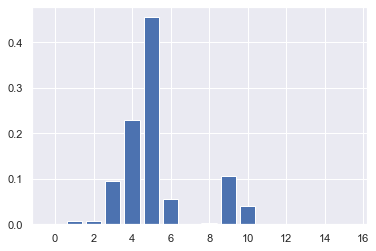

In [57]:
# plot feature importance
# feature importance
print(gbr.feature_importances_)
# plot
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<AxesSubplot:>

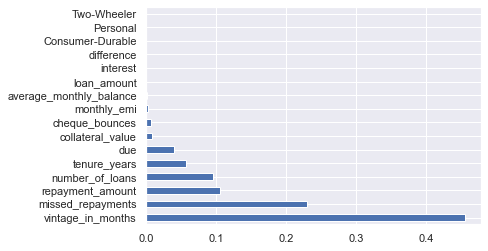

In [58]:
feat_importances = pd.Series(gbr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

**Pycaret**

In [59]:
dataset = pd.read_csv("G:/M/BA/BFSI Credit Risk Analysis/pycaret_test.csv")
data_ = dataset.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data_.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (39911, 17)
Unseen Data For Predictions: (9978, 17)


In [60]:
#import pycaret
from pycaret.regression import *

In [61]:
exp_reg101 = setup(data = data_, target = 'target', session_id=123) 

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Regression
3,Original data shape,"(39911, 17)"
4,Transformed data shape,"(39911, 17)"
5,Transformed train set shape,"(27937, 17)"
6,Transformed test set shape,"(11974, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [62]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0142,0.0004,0.0188,0.9929,0.0135,0.0896,0.3640
xgboost,Extreme Gradient Boosting,0.0232,0.0009,0.0305,0.9811,0.0218,0.1204,0.5600
lightgbm,Light Gradient Boosting Machine,0.0322,0.0018,0.0422,0.9638,0.0303,0.1820,0.5700
rf,Random Forest Regressor,0.0463,0.0039,0.0625,0.9206,0.0454,0.2828,0.8200
gbr,Gradient Boosting Regressor,0.0501,0.0043,0.0657,0.9122,0.0473,0.3028,0.3710
et,Extra Trees Regressor,0.0527,0.0051,0.0715,0.8961,0.0523,0.3223,1.1340
dt,Decision Tree Regressor,0.0662,0.0084,0.0916,0.8294,0.0663,0.3338,0.3090
ada,AdaBoost Regressor,0.0839,0.0104,0.1020,0.7883,0.0734,0.5842,0.3500
ridge,Ridge Regression,0.0823,0.0108,0.1041,0.7796,0.0731,0.5366,0.3050
lr,Linear Regression,0.0823,0.0108,0.1041,0.7796,0.0731,0.5366,1.5480


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [63]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0145,0.0004,0.0189,0.9927,0.0134,0.1503
1,0.0140,0.0003,0.0185,0.9931,0.0132,0.0662
2,0.0136,0.0003,0.0182,0.9933,0.0131,0.0530
3,0.0147,0.0004,0.0193,0.9926,0.0138,0.0580
4,0.0137,0.0003,0.0181,0.9932,0.0130,0.0554
5,0.0140,0.0003,0.0186,0.9930,0.0134,0.0590
6,0.0147,0.0004,0.0198,0.9921,0.0142,0.0623
7,0.0146,0.0004,0.0191,0.9926,0.0137,0.2194
8,0.0138,0.0003,0.0182,0.9931,0.0132,0.0611


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
print(cat)

In [64]:
tuned_cat = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0135,0.0003,0.0178,0.9935,0.0127,0.1391
1,0.0141,0.0004,0.0188,0.9929,0.0136,0.0726
2,0.0135,0.0003,0.0179,0.9935,0.0130,0.0546
3,0.0141,0.0004,0.0189,0.9928,0.0136,0.0578
4,0.0136,0.0003,0.0181,0.9933,0.0131,0.0567
5,0.0134,0.0003,0.0182,0.9934,0.0132,0.0578
6,0.0140,0.0004,0.0188,0.9929,0.0137,0.0627
7,0.0138,0.0003,0.0182,0.9933,0.0131,0.1140
8,0.0138,0.0003,0.0179,0.9933,0.0130,0.0615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


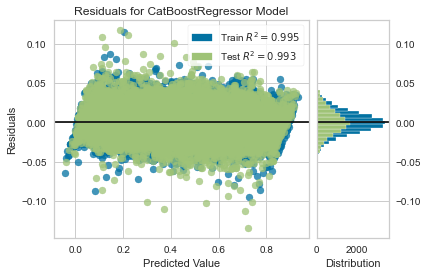

In [65]:
plot_model(tuned_cat)

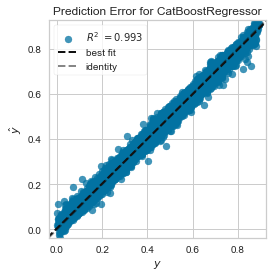

In [14]:
plot_model(tuned_cat, plot = 'error')

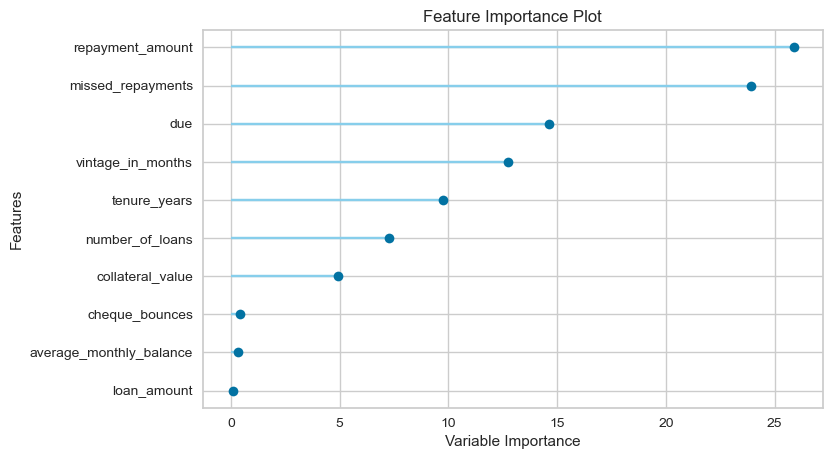

In [15]:
plot_model(tuned_cat, plot='feature')

So, the highly important features are
1. repayment_amount
2. missed_repayments
3. due
4. vintage_in_months
5. tenure_years

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

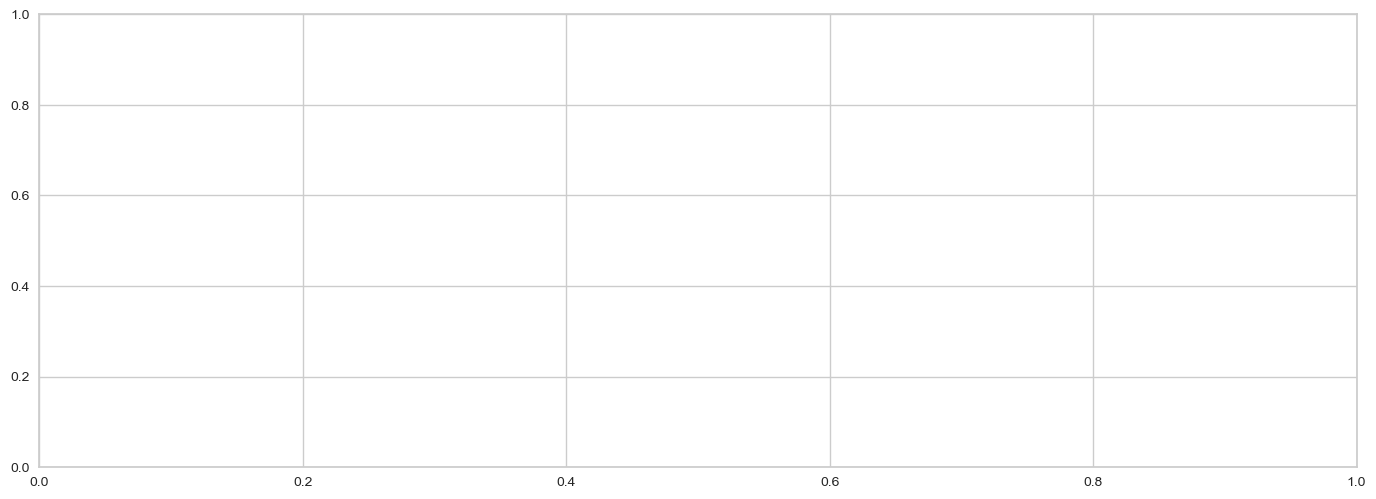

In [66]:
evaluate_model(tuned_cat)

In [21]:
predict_model(tuned_cat);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0136,0.0003,0.0181,0.9932,0.0130,0.0673


In [22]:
final_cat = finalize_model(tuned_cat)

In [23]:
predict_model(final_cat);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0112,0.0002,0.0146,0.9955,0.0105,0.0512


In [24]:
unseen_predictions = predict_model(final_cat, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0114,0.0002,0.0149,0.9955,0.0109,0.0621


,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,due,average_monthly_balance,difference,Consumer-Durable,Personal,Two-Wheeler,target,prediction_label
0,14.568925,6.185971,1.414214,3,0.000000,7.810250,1,9.6,6.214138,11.815962,426025.718750,5.287674,2727.784424,0,0,0,0.635279,0.619682
1,17.860989,13.309298,1.732051,1,2.000000,10.099504,3,11.5,6.255868,16.553556,574763.437500,5.186107,2914.784424,0,0,0,0.086454,0.092910
2,7.285809,4.045664,1.414214,0,3.000000,9.219544,5,13.2,2.787603,6.774142,6265.009766,2.165705,-486.215637,1,0,0,0.252373,0.250321
3,10.504994,7.864090,1.000000,3,4.795832,5.477226,5,12.0,3.764439,6.770711,113703.101562,3.176598,-276.215637,0,0,1,0.653672,0.660280
4,7.558163,5.450387,1.000000,0,3.741657,10.862781,3,11.2,3.053045,5.907742,17468.730469,2.786364,2050.784424,1,0,0,0.513230,0.509142


In [25]:
save_model(final_cat,'Final Catboost Model BFSI')

Transformation Pipeline and Model Successfully Saved


(<catboost.core.CatBoostRegressor at 0x2bafaaa3f40>,
 'Final Catboost Model BFSI.pkl')

In [26]:
saved_final_lightgbm = load_model('Final Catboost Model BFSI')

Transformation Pipeline and Model Successfully Loaded


Finalized the Catboost Regressor with 99.55% Rsqaured on test data

**Further Experiments**

**Using XGBoost Regressor**

In [67]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [68]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.982 (0.001)


In [69]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.975 (0.002)


In [33]:
from xgboost import XGBRegressor
# define model
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [34]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

[23:56:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
train score:  0.9173986092495037
test score:  0.9193184376918949


**Using Adaboost Regressor**

In [70]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.7720725425236656
test score:  0.7769300756929037


**Using ElasticNet : Hybrid Regularized Model**

In [71]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [72]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [73]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train,y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.78, MSE:0.01, RMSE:0.10
Alpha:0.0010, R2:0.77, MSE:0.01, RMSE:0.10
Alpha:0.0100, R2:0.75, MSE:0.01, RMSE:0.11
Alpha:0.1000, R2:0.55, MSE:0.02, RMSE:0.15
Alpha:0.3000, R2:0.01, MSE:0.05, RMSE:0.22
Alpha:0.5000, R2:0.00, MSE:0.05, RMSE:0.22
Alpha:0.7000, R2:0.00, MSE:0.05, RMSE:0.22
Alpha:1.0000, R2:0.00, MSE:0.05, RMSE:0.22


In [74]:
elastic=ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.780, MSE:0.01, RMSE:0.10


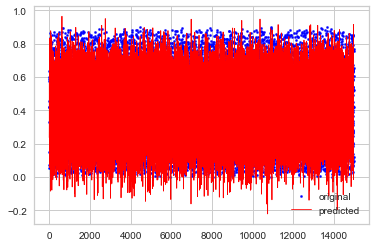

In [75]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [76]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print("Alpha: ",model.alpha_)
print("Intercept: ",model.intercept_)

Alpha:  0.0001
Intercept:  0.4241654676370259


In [77]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.781, MSE:0.01, RMSE:0.10


**Using LightGBM**

In [85]:
plt.style.use('ggplot')
import lightgbm as ltb

In [86]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)


LGBMRegressor()


In [87]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

Rsqaured on test data:  0.965125001305115


**Model Evaluation: Hyperparameter Tuning**

In [80]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
params = { 'max_depth': [3,4,5],
           'learning_rate': [0.01, 0.05, 0.1,0.25,0.5,0.015,1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 1000}


In [51]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

[09:21:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
train score:  0.9976735242733454
test score:  0.9951954973633294


In [168]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

[09:23:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
train score:  0.9976735242733454
test score:  0.9951954973633294


So, we can finalize fine tuned XGBoost as well as it is giving us 99.5% Rsqaured on test data

**Prediction on Unseen Data**

In [172]:
data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler'],
      dtype='object')

In [174]:
test_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler'],
      dtype='object')

In [52]:
test_data = sc.fit_transform(test_data)

In [178]:
test_data = pd.DataFrame(test_data)

In [181]:
test_data.columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler']

In [53]:
#Making predictions
final_predictions = XGB.predict(test_data)
final_prediction_series = pd.Series(final_predictions)

In [54]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'id':test['loan_acc_num'].values, 'LGD':final_prediction_series.values})

In [55]:
submission_df.sample(10)

,id,LGD
6250,LN98652279,0.397420
1290,LN67179430,0.531890
8134,LN93768015,0.105783
8106,LN13936209,0.833338
3710,LN87883854,0.180424
4077,LN81328784,0.592162
6671,LN65185585,0.119256
6761,LN97144919,0.576881
3634,LN73423344,0.390853
1211,LN78029594,0.372086


In [56]:
submission_df.to_csv("G:/M/BA/BFSI Credit Risk Analysis/submission.csv",index=False)